# Intro

In [1]:
import pandas as pd
import numpy as np
import re
import time
from ast import literal_eval
import matplotlib.pyplot as plt
import ast
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_preprocesado = pd.read_csv('/content/drive/My Drive/TFMSandoz/Entrega/DatosFinales/df_Preprocesado.csv')
df_preprocesado

,Patent,Patent_Name,Status,Most_Recent_Event_Date,Most_Recent_Event,Divisional_applications,Parent_applications,Inventors,Priority_numbers,Applicants,Representatives,IPC,CPC,Opponent,Publications,patent_family,counterType_patent_family,firstDate_patent_family,lastDate_patent_family
0,EP0721594,AUTONOMOUS CRUISE CONTROL,No opposition filed within time limit,28.12.2007,Lapse of the patent in a contracting state\nNe...,"[{""EP01109826.6"": ""EP1167108""}]",[],"[{""number"": ""01"", ""name"": ""WOLL, Jerry"", ""addr...",[{'US19930130585': '01.10.1993'}],"[{""type"": ""current"", ""for"": ""For all designate...","[{""name"": ""R\u00fcger Abel Patentanw\u00e4lte ...","[""G01S13/60, B60K31/00, G01S13/93<br/>""]","[""B60K31/0008 (EP,KR,US);"", ""B60W30/146 (EP);""...",[],"[{""Type"": ""A1\u00a0Application with search rep...","[{'Publication No.': 'JP3104998B', 'Date': '30...","{'B2': 1, 'A': 4, 'A1': 4, 'B1': 1, 'A4': 1, '...",1995-04-13,2003-05-08
1,EP0737549,Abrasive tape and process for producing it,No opposition filed within time limit,24.10.2003,No opposition filed within time limit,"[{""EP02012459.0"": ""EP1250983""}]",[],"[{""number"": ""01"", ""name"": ""Fujii, Kazuhito, c/...","[{'JP19950109088': '10.04.1995'}, {'JP19960005...","[{""type"": ""current"", ""for"": ""For all designate...","[{""name"": ""M\u00fcller-Bor\u00e9 &amp; Partner...","[""B24D3/00, B24D11/00, B24D3/28<br/>""]","[""B24B19/226 (EP,US);"", ""B24D3/00 (KR);"", ""B24...",[],"[{""Type"": ""A2\u00a0Application without search ...",NaN,NaN,NaN,NaN
2,EP0788617,MINIATURE OPTICAL SCANNER FOR A TWO AXIS SCANN...,No opposition filed within time limit,04.01.2008,Lapse of the patent in a contracting state\nNe...,"[{""EP01202983.1"": ""EP1168032""}]",[],"[{""number"": ""01"", ""name"": ""MELVILLE, Charles, ...",[{'US19940329508': '26.10.1994'}],"[{""type"": ""current"", ""for"": ""For all designate...","[{""name"": ""Hitchcock, Esmond Antony"", ""address...","[""G02B26/08, G02B26/10, G02B7/182<br/>""]","[""G02B26/10 (EP,US);"", ""G02B26/101 (EP,US);"", ...",[],"[{""Type"": ""A1\u00a0Application with search rep...","[{'Publication No.': 'JP2001523350', 'Date': '...","{'A': 4, 'A3': 1, 'A2': 1, 'B1': 2, 'A4': 1, '...",1996-05-09,2006-08-22
3,EP0885233,TERPYRIDINE-PLATINUM(II) COMPLEXES,No opposition filed within time limit,25.04.2003,No opposition filed within time limit,"[{""EP01121776.7"": ""EP1164138""}]",[],"[{""number"": ""01"", ""name"": ""LOWE, Gordon"", ""add...",[{'GB19960001603': '26.01.1996'}],"[{""type"": ""current"", ""for"": ""For all designate...","[{""name"": ""Ellis-Jones, Patrick George Armine,...","[""C07F15/00, C07D213/06, C07D213/22, C07H19/06...","[""C07H21/00 (EP,US);"", ""A61P33/00 (EP);"", ""A61...",[],"[{""Type"": ""A1\u00a0Application with search rep...",NaN,NaN,NaN,NaN
4,EP1105513,METHODS AND COMPOSITIONS FOR USE IN SPLICEOSOM...,The application is deemed to be withdrawn,14.01.2005,Application deemed to be withdrawn,"[{""EP04077408.5"": ""EP1489185""}]",[],"[{""number"": ""01"", ""name"": ""MITCHELL, Lloyd, G....","[{'US19980133717': '13.08.1998'}, {'US19980158...","[{""type"": ""current"", ""for"": ""For all designate...","[{""name"": ""Lucas, Brian Ronald"", ""address_line...","[""C12N15/90, A61K48/00, C12N15/11, // A61P11:0...","[""C12N15/1027 (EP,US);"", ""A61K48/00 (EP,US);"",...",[],"[{""Type"": ""A2\u00a0Application without search ...","[{'Publication No.': 'WO9722250', 'Date': '26....","{'A1': 21, 'A3': 3, 'A2': 6, 'A': 13, 'B2': 8,...",1997-06-26,2015-11-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,EP3937083,SMART METAL CARD WITH RADIO FREQUENCY (RF) TRA...,Examination is in progress,15.11.2023,New entry: Renewal fee paid,[],"[{""EP15874266.8"": ""EP3238139""}]","[{""number"": ""01"", ""name"": ""HERSLOW, John"", ""ad...",[{'US201462095901P': '23.12.2014'}],"[{""type"": ""current"", ""for"": ""For all designate...","[{""name"": ""Scheele Jaeger Wetzel Patentanw\u00...","[""G06K19/077, G06K19/06<

# Patent Families

In [4]:
df_patent_family = df_preprocesado[["Patent", "patent_family"]]
df_patent_family

,Patent,patent_family
0,EP0721594,"[{'Publication No.': 'JP3104998B', 'Date': '30..."
1,EP0737549,NaN
2,EP0788617,"[{'Publication No.': 'JP2001523350', 'Date': '..."
3,EP0885233,NaN
4,EP1105513,"[{'Publication No.': 'WO9722250', 'Date': '26...."
...,...,...
143,EP3937083,"[{'Publication No.': 'US9898699', 'Date': '20...."
144,EP3992203,"[{'Publication No.': 'US9725732', 'Date': '08...."
145,EP4036079,"[{'Publication No.': 'US2021161829', 'Date': '..."
146,EP4215191,"[{'Publication No.': 'US2019008817', 'Date': '..."


In [5]:
# Función para analizar una familia de patentes
def analizar_familia_patentes(patent_family):
    # Inicializar contadores
    total_A = 0  # Total de registros (A)
    total_B = 0  # Total de registros concedidos (B)
    region_data = {}

    # Patrones regex para identificar tipos A y B
    pattern_A = re.compile(r'^A\d*$')  # Coincide con A, A1, A2, etc.
    pattern_B = re.compile(r'^B\d*$')  # Coincide con B, B1, B2, etc.

    # Análisis de cada patente en la familia
    for patent in patent_family:
        pub_no = patent['Publication No.']
        p_type = patent['Type']

        # Identificar región por el prefijo del número de publicación
        region = pub_no[:2]

        # Inicializar región si no existe
        if region not in region_data:
            region_data[region] = {'A': 0, 'B': 0}

        # Contar el total (A) y concedidos (B) por región
        if pattern_A.match(p_type):
            region_data[region]['A'] += 1
            total_A += 1
        elif pattern_B.match(p_type):
            region_data[region]['B'] += 1
            total_B += 1
            #region_data[region]['A'] += 1  # Contamos también como A para total_A
            #total_A += 1

    # Calcular la tasa de éxito para cada región
    for region in region_data:
        A = region_data[region]['A']
        B = region_data[region]['B']
        success_rate = (B / A) * 100 if A > 0 else 0
        region_data[region]['Success Rate'] = success_rate

    # Calcular la tasa de éxito total
    total_success_rate = (total_B / total_A) * 100 if total_A > 0 else 0

    return total_A, total_B, total_success_rate, region_data

# Convertir la columna 'patent_family' de cadenas a listas de diccionarios
df_patent_family['patent_family'] = df_patent_family['patent_family'].apply(lambda x: literal_eval(x) if pd.notna(x) else [])

# Aplicar la función a cada familia de patentes en el DataFrame
df_patent_family['Total_A'], df_patent_family['Total_B'], df_patent_family['Total_Success_Rate'], df_patent_family['Region_Data'] = zip(*df_patent_family['patent_family'].apply(analizar_familia_patentes))

<ipython-input-5-6a238e14c622>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patent_family['patent_family'] = df_patent_family['patent_family'].apply(lambda x: literal_eval(x) if pd.notna(x) else [])
<ipython-input-5-6a238e14c622>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patent_family['Total_A'], df_patent_family['Total_B'], df_patent_family['Total_Success_Rate'], df_patent_family['Region_Data'] = zip(*df_patent_family['patent_family'].apply(analizar_familia_patentes))
<ipython-input-5-6a

In [6]:
# Imprimir el DataFrame con los resultados
df_patent_family[['Patent', 'patent_family', 'Total_A', 'Total_B', 'Total_Success_Rate', 'Region_Data']]


,Patent,patent_family,Total_A,Total_B,Total_Success_Rate,Region_Data
0,EP0721594,"[{'Publication No.': 'JP3104998B', 'Date': '30...",9,2,22.222222,"{'JP': {'A': 1, 'B': 1, 'Success Rate': 100.0}..."
1,EP0737549,[],0,0,0.000000,{}
2,EP0788617,"[{'Publication No.': 'JP2001523350', 'Date': '...",11,2,18.181818,"{'JP': {'A': 1, 'B': 0, 'Success Rate': 0.0}, ..."
3,EP0885233,[],0,0,0.000000,{}
4,EP1105513,"[{'Publication No.': 'WO9722250', 'Date': '26....",46,10,21.739130,"{'WO': {'A': 8, 'B': 0, 'Success Rate': 0.0}, ..."
...,...,...,...,...,...,...
143,EP3937083,"[{'Publication No.': 'US9898699', 'Date': '20....",7,3,42.857143,"{'US': {'A': 2, 'B': 2, 'Success Rate': 100.0}..."
144,EP3992203,"[{'Publication No.': 'US9725732', 'Date': '08....",19,8,42.105263,"{'US': {'A': 6, 'B': 5, 'Success Rate': 83.333..."
145,EP4036079,"[{'Publication No.': 'US2021161829', 'Date': '...",12,8,66.666667,"{'US': {'A': 3, 'B': 2, 'Success Rate': 66.666..."
146,EP4215191,"[{'Publication No.': 'US2019008817', 'Date': '...",36,12,33.333333,"{'US': {'A': 8, 'B': 5, 'Success Rate': 62.5},..."


In [7]:
df_patent_family["Region_Data"][4]

{'WO': {'A': 8, 'B': 0, 'Success Rate': 0.0},
 'US': {'A': 12, 'B': 1, 'Success Rate': 8.333333333333332},
 'JP': {'A': 9, 'B': 2, 'Success Rate': 22.22222222222222},
 'EP': {'A': 7, 'B': 2, 'Success Rate': 28.57142857142857},
 'CA': {'A': 5, 'B': 0, 'Success Rate': 0.0},
 'AU': {'A': 5, 'B': 5, 'Success Rate': 100.0},
 'AT': {'A': 0, 'B': 0, 'Success Rate': 0},
 'DE': {'A': 0, 'B': 0, 'Success Rate': 0},
 'ES': {'A': 0, 'B': 0, 'Success Rate': 0}}

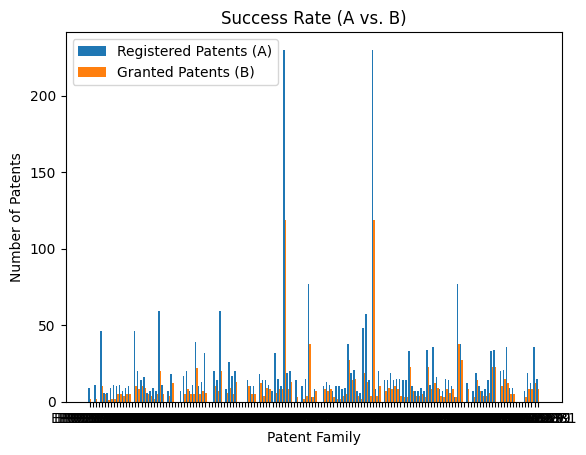

In [8]:
# Plotting side-by-side bar chart
x = np.arange(len(df_patent_family['Patent']))  # label locations
width = 0.5  # width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_patent_family['Total_A'], width, label='Registered Patents (A)')
rects2 = ax.bar(x + width/2, df_patent_family['Total_B'], width, label='Granted Patents (B)')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Number of Patents')
ax.set_xlabel('Patent Family')
ax.set_title('Success Rate (A vs. B)')
ax.set_xticks(x)
ax.set_xticklabels(df_patent_family['Patent'])
ax.legend()

plt.show()


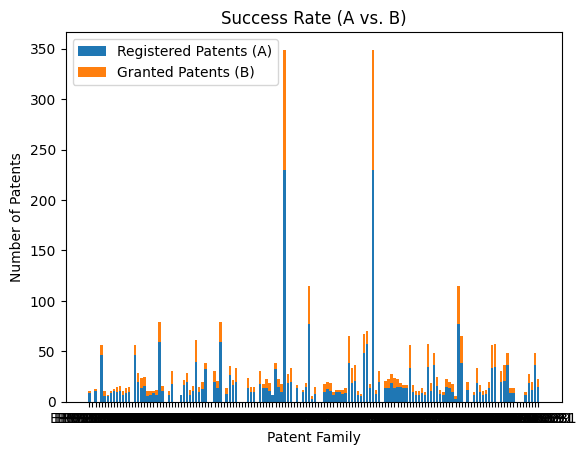

In [9]:
# Plotting stacked bar chart
fig, ax = plt.subplots()

ax.bar(df_patent_family['Patent'], df_patent_family['Total_A'], label='Registered Patents (A)')
ax.bar(df_patent_family['Patent'], df_patent_family['Total_B'], bottom=df_patent_family['Total_A'], label='Granted Patents (B)')

ax.set_ylabel('Number of Patents')
ax.set_xlabel('Patent Family')
ax.set_title('Success Rate (A vs. B)')
ax.legend()

plt.show()


In [10]:
# Inicializar un conjunto vacío para almacenar los códigos de país únicos
unique_countries = set()

# Iterar sobre cada fila del DataFrame
for region_data in df_patent_family['Region_Data']:
    # Agregar todos los códigos de país de cada fila al conjunto
    unique_countries.update(region_data.keys())

# Convertir el conjunto a una lista (opcional)
unique_countries_list = list(unique_countries)

# Imprimir la lista de códigos de país únicos
print(unique_countries_list)
print(len(unique_countries_list))


['FR', 'US', 'JP', 'IT', 'CL', 'HU', 'UA', 'GB', 'ME', 'MX', 'NZ', 'BR', 'ES', 'CN', 'MY', 'PH', 'JO', 'EC', 'MA', 'AR', 'PL', 'RU', 'DK', 'TN', 'KR', 'RS', 'ZA', 'LU', 'PT', 'CR', 'EA', 'AT', 'GT', 'CA', 'IL', 'HR', 'SI', 'PE', 'SM', 'HK', 'UY', 'TR', 'SA', 'TW', 'CO', 'WO', 'CY', 'LT', 'CZ', 'FI', 'NO', 'EP', 'GE', 'SG', 'AU', 'DE']
56


In [11]:

# Definir los códigos de país de la UE
eu_countries = ['EP', 'DE', 'FR', 'GB', 'IT', 'ES', 'AT', 'NL', 'SE', 'BE', 'FI', 'IE', 'PT', 'DK', 'GR', 'LU', 'CZ', 'HU', 'PL', 'SK', 'SI', 'RO', 'BG', 'HR', 'EE', 'LT', 'LV', 'CY', 'MT']

# Función para calcular la exposición dentro y fuera de la UE
def calcular_exposicion_eu(region_data):
    num_eu = 0
    num_eu_B = 0
    num_non_eu = 0
    num_non_eu_B = 0

    for region, data in region_data.items():
        if region in eu_countries:
            num_eu += data['A']
            num_eu_B += data['B']
        else:
            num_non_eu += data['A']
            num_non_eu_B += data['B']

    return num_eu, num_eu_B, num_non_eu, num_non_eu_B

# Aplicar la función a cada fila del DataFrame
df_patent_family['Num_EU'], df_patent_family['Num_EU_B'], df_patent_family['Num_Non_EU'], df_patent_family['Num_Non_EU_B'] = zip(*df_patent_family['Region_Data'].apply(calcular_exposicion_eu))

# Crear una variable binaria que indique si la exposición fuera de la UE es mayor que dentro de la UE
df_patent_family['Exposicion_Fuera_EU_Mayor'] = (df_patent_family['Num_Non_EU'] > df_patent_family['Num_EU']).astype(int)

# Crear una variable binaria que indique si la exposición fuera de la UE es significativamente mayor en cuanto a concesiones (B)
df_patent_family['Exposicion_Fuera_EU_Mayor_B'] = (df_patent_family['Num_Non_EU_B'] > df_patent_family['Num_EU_B']).astype(int)



<ipython-input-11-b936f9e7419e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patent_family['Num_EU'], df_patent_family['Num_EU_B'], df_patent_family['Num_Non_EU'], df_patent_family['Num_Non_EU_B'] = zip(*df_patent_family['Region_Data'].apply(calcular_exposicion_eu))
<ipython-input-11-b936f9e7419e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patent_family['Num_EU'], df_patent_family['Num_EU_B'], df_patent_family['Num_Non_EU'], df_patent_family['Num_Non_EU_B'] = zip(*df_patent_family['Region_

In [12]:
# Revisar el DataFrame
df_patent_family[['Patent', 'Num_EU', 'Num_EU_B', 'Num_Non_EU', 'Num_Non_EU_B', 'Exposicion_Fuera_EU_Mayor', 'Exposicion_Fuera_EU_Mayor_B']]


,Patent,Num_EU,Num_EU_B,Num_Non_EU,Num_Non_EU_B,Exposicion_Fuera_EU_Mayor,Exposicion_Fuera_EU_Mayor_B
0,EP0721594,3,1,6,1,1,0
1,EP0737549,0,0,0,0,0,0
2,EP0788617,4,1,7,1,1,0
3,EP0885233,0,0,0,0,0,0
4,EP1105513,7,2,39,8,1,1
...,...,...,...,...,...,...,...
143,EP3937083,3,1,4,2,1,1
144,EP3992203,4,2,15,6,1,1
145,EP4036079,3,1,9,7,1,1
146,EP4215191,3,0,33,12,1,1


In [13]:
df_patent_family

,Patent,patent_family,Total_A,Total_B,Total_Success_Rate,Region_Data,Num_EU,Num_EU_B,Num_Non_EU,Num_Non_EU_B,Exposicion_Fuera_EU_Mayor,Exposicion_Fuera_EU_Mayor_B
0,EP0721594,"[{'Publication No.': 'JP3104998B', 'Date': '30...",9,2,22.222222,"{'JP': {'A': 1, 'B': 1, 'Success Rate': 100.0}...",3,1,6,1,1,0
1,EP0737549,[],0,0,0.000000,{},0,0,0,0,0,0
2,EP0788617,"[{'Publication No.': 'JP2001523350', 'Date': '...",11,2,18.181818,"{'JP': {'A': 1, 'B': 0, 'Success Rate': 0.0}, ...",4,1,7,1,1,0
3,EP0885233,[],0,0,0.000000,{},0,0,0,0,0,0
4,EP1105513,"[{'Publication No.': 'WO9722250', 'Date': '26....",46,10,21.739130,"{'WO': {'A': 8, 'B': 0, 'Success Rate': 0.0}, ...",7,2,39,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
143,EP3937083,"[{'Publication No.': 'US9898699', 'Date': '20....",7,3,42.857143,"{'US': {'A': 2, 'B': 2, 'Success Rate': 100.0}...",3,1,4,2,1,1
144,EP3992203,"[{'Publication No.': 'US9725732', 'Date': '08....",19,8,42.105263,"{'US': {'A': 6, 'B': 5, 'Success Rate': 83.333...",4,2,15,6,1,1
145,EP4036079,"[{'Publication No.': 'US2021161829', 'Date': '...",12,8,66.666667,"{'US': {'A': 3, 'B': 2, 'Success Rate': 66.666...",3,1,9,7,1,1
146,EP4215191,"[{'Publication No.': 'US2019008817', 'Date': '...",36,12,33.333333,"{'US': {'A': 8, 'B': 5, 'Success Rate': 62.5},...",3,0,33,12,1,1


## Por continentes

In [14]:
data_regions = pd.read_csv('/content/drive/My Drive/TFMSandoz/GonYari/df_Ready_For_Model_1709.csv')

In [15]:
data_regions


,family_id,Total_A,Total_B,Total_Success_Rate,num_europe,num_europe_B,patent_family_success_rate_europe,num_america,num_america_B,patent_family_success_rate_america,...,PatentFamily_Type_U,PatentFamily_Type_D1,PatentFamily_Type_C2,PatentFamily_Type_A9,PatentFamily_Type_C,PatentFamily_Type_A2,PatentFamily_Type_C1,PatentFamily_Type_A3,PatentFamily_Type_T3,PatentFamily_Type_total
0,1.0,9,2,22.222222,3,1,0.333333,3,0,0.000000,...,0,1,0,0,0,0,0,0,0,13
1,2.0,11,5,45.454545,3,1,0.333333,3,1,0.333333,...,0,1,0,0,0,1,0,0,0,16
2,3.0,11,2,18.181818,4,1,0.250000,4,1,0.250000,...,0,1,0,0,0,1,0,0,0,13
3,4.0,6,1,16.666667,2,1,0.500000,2,0,0.000000,...,0,1,0,0,0,0,0,0,2,12
4,5.0,46,10,21.739130,7,2,0.285714,17,1,0.058824,...,0,1,0,0,0,6,0,0,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61.0,36,12,33.333333,3,0,0.000000,10,5,0.500000,...,0,0,0,0,0,0,0,0,0,48
61,62.0,7,3,42.857143,3,1,0.333333,2,2,1.000000,...,0,0,0,0,0,2,0,0,3,10
62,63.0,15,8,53.333333,6,2,0.333333,2,2,1.000000,...,0,0,0,0,0,3,0,0,1,18
63,64.0,14,6,42.857143,3,0,0.000000,4,4,1.000000,...,0,0,0,0,0,0,0,0,0,19


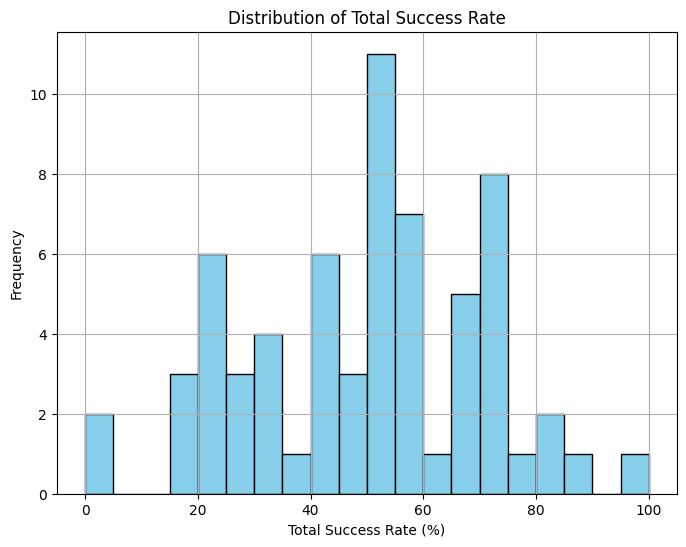

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(data_regions['Total_Success_Rate'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Total Success Rate')
plt.xlabel('Total Success Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-17-c50da048803e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_regions['Total_Success_Rate'], shade=True, color='blue')


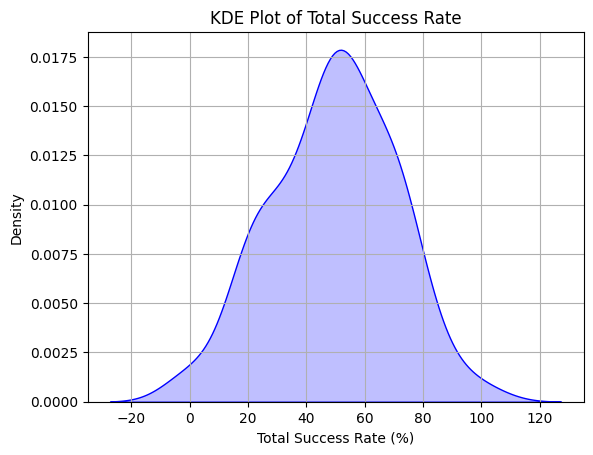

In [17]:
import seaborn as sns

sns.kdeplot(data_regions['Total_Success_Rate'], shade=True, color='blue')
plt.title('KDE Plot of Total Success Rate')
plt.xlabel('Total Success Rate (%)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


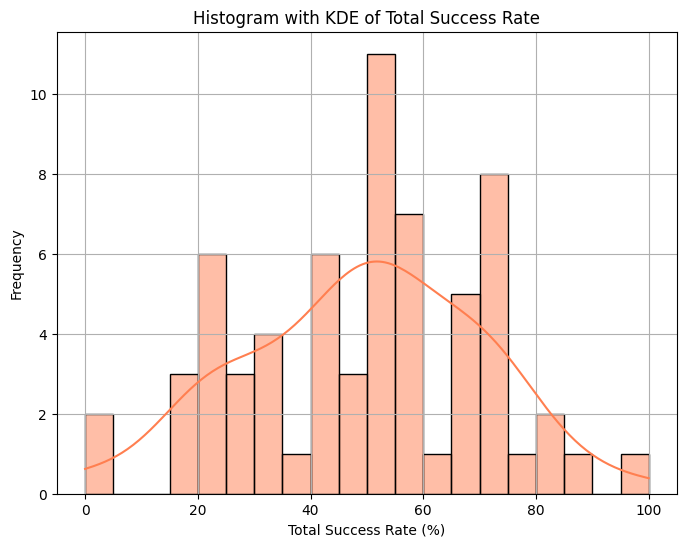

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data_regions['Total_Success_Rate'], kde=True, bins=20, color='coral')
plt.title('Histogram with KDE of Total Success Rate')
plt.xlabel('Total Success Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [61]:
from scipy.stats import shapiro

stat, p = shapiro(data_regions['Total_Success_Rate'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
if p > 0.05:
    print('Probably Normally Distributed')
else:
    print('Probably Not Normally Distributed')


Statistics=0.983, p=0.511
Probably Normally Distributed


In [19]:
regions = data_regions[['patent_family_success_rate_asia', 'num_asia',
                        'patent_family_success_rate_europe', 'num_europe',
                        'patent_family_success_rate_africa', 'num_africa',
                        'patent_family_success_rate_oceania', 'num_oceania',
                        'patent_family_success_rate_america', 'num_america']]
regions

,patent_family_success_rate_asia,num_asia,patent_family_success_rate_europe,num_europe,patent_family_success_rate_africa,num_africa,patent_family_success_rate_oceania,num_oceania,patent_family_success_rate_america,num_america
0,0.500000,2,0.333333,3,0.0,0,0.0,0,0.000000,3
1,0.600000,5,0.333333,3,0.0,0,0.0,0,0.333333,3
2,0.000000,1,0.250000,4,0.0,0,0.0,1,0.250000,4
3,0.000000,1,0.500000,2,0.0,0,0.0,0,0.000000,2
4,0.222222,9,0.285714,7,0.0,0,1.0,5,0.058824,17
...,...,...,...,...,...,...,...,...,...,...
60,0.384615,13,0.000000,3,0.5,2,0.0,5,0.500000,10
61,0.000000,0,0.333333,3,0.0,0,0.0,0,1.000000,2
62,1.000000,4,0.333333,6,0.0,0,0.0,0,1.000000,2
63,0.333333,6,0.000000,3,0.0,0,0.0,0,1.000000,4


In [20]:
regions = regions.rename(columns={
    'patent_family_success_rate_asia': 'Asia',
    'patent_family_success_rate_europe': 'Europe',
    'patent_family_success_rate_africa': 'Africa',
    'patent_family_success_rate_oceania': 'Oceania',
    'patent_family_success_rate_america': 'America'
})

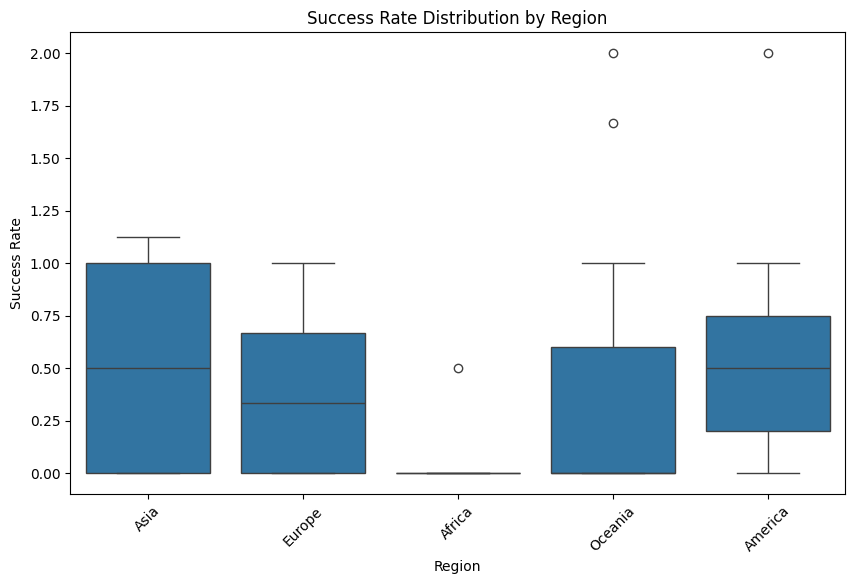

In [58]:
regions_melt = regions.melt(var_name='Region', value_name='Success Rate',
                            value_vars=['Asia', 'Europe', 'Africa', 'Oceania', 'America'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Success Rate', data=regions_melt)
plt.title('Success Rate Distribution by Region')
plt.xticks(rotation=45)
plt.show()


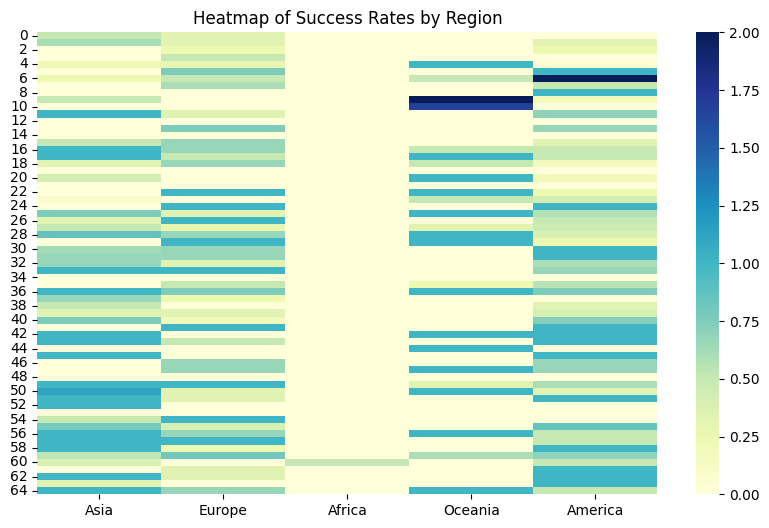

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(regions[['Asia', 'Europe', 'Africa', 'Oceania', 'America']],
            cmap="YlGnBu")
plt.title('Heatmap of Success Rates by Region')
plt.show()


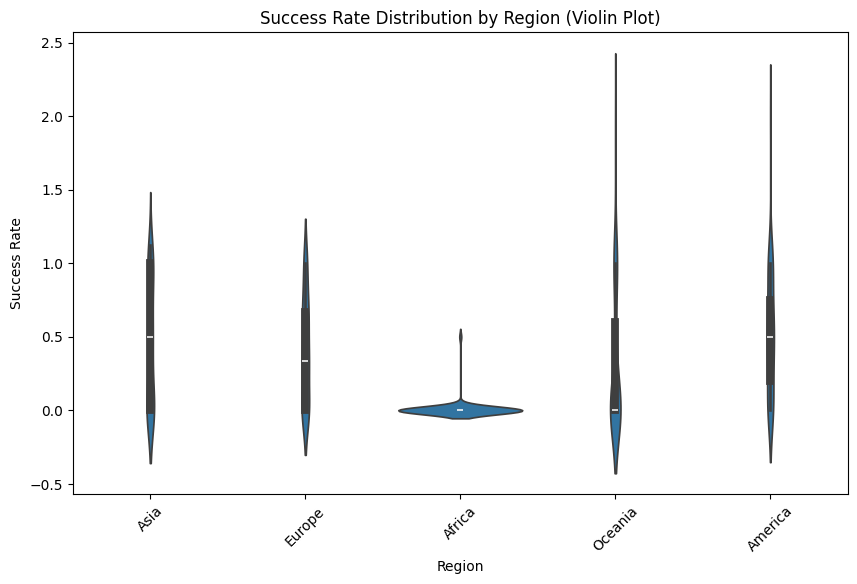

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Region', y='Success Rate', data=regions_melt)
plt.title('Success Rate Distribution by Region (Violin Plot)')
plt.xticks(rotation=45)
plt.show()


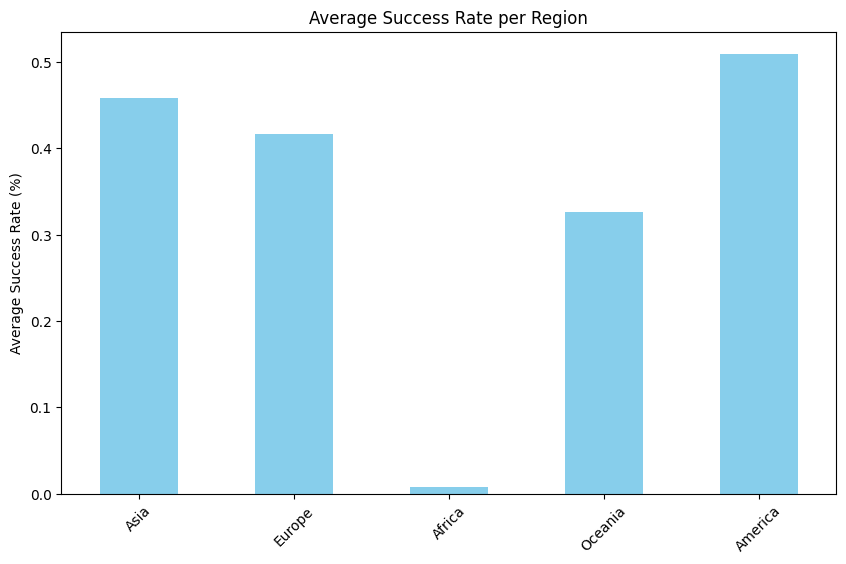

In [53]:
regions_means = regions[['Asia', 'Europe', 'Africa', 'Oceania', 'America']].mean()

regions_means.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Success Rate per Region')
plt.ylabel('Average Success Rate (%)')
plt.xticks(rotation=45)
plt.show()


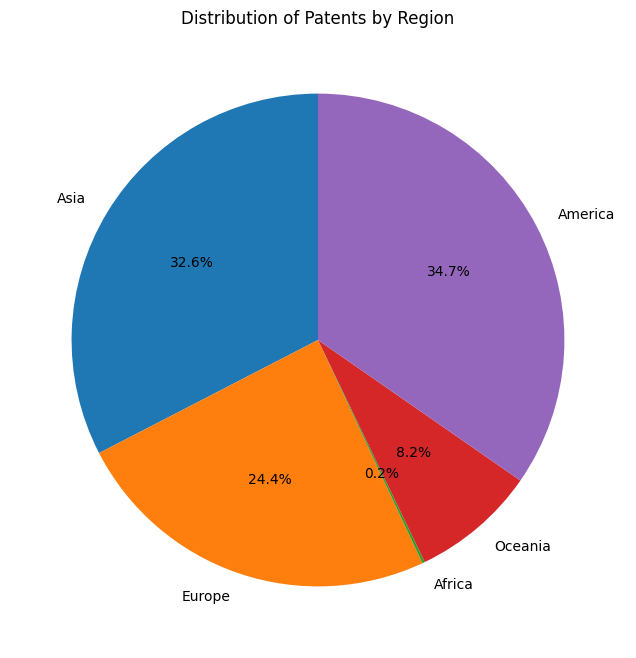

In [56]:
total_patents = regions[['num_asia', 'num_europe', 'num_africa', 'num_oceania', 'num_america']].sum()

plt.figure(figsize=(8, 8))
plt.pie(total_patents, labels=['Asia', 'Europe', 'Africa', 'Oceania', 'America'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Patents by Region')
plt.show()


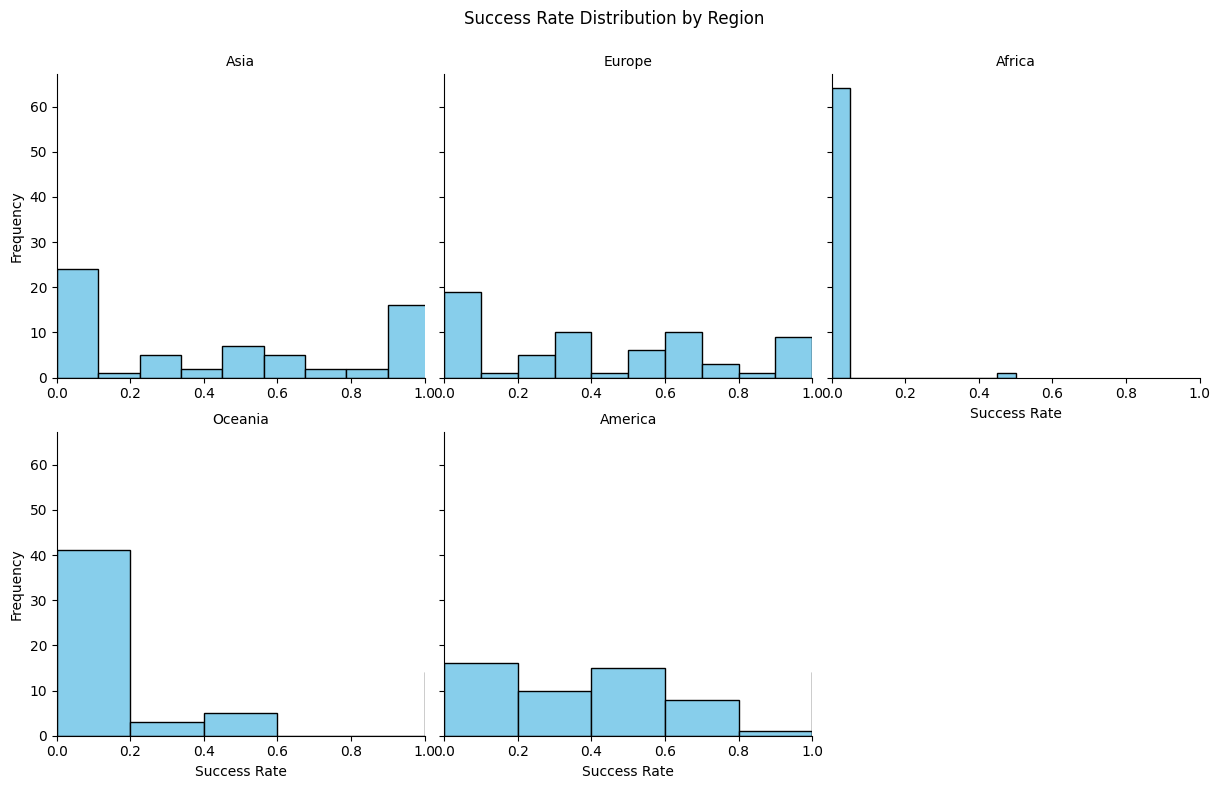

In [59]:
g = sns.FacetGrid(regions_melt, col="Region", col_wrap=3, height=4, sharex=False)
g.map(plt.hist, "Success Rate", bins=10, color="skyblue", edgecolor="black")
g.set_titles("{col_name}")  # Set titles to the region names
g.set_axis_labels("Success Rate", "Frequency")  # Set axis labels

# Set limits for x-axis to range between 0 and 1
for ax in g.axes.flat:
    ax.set_xlim(0, 1)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Success Rate Distribution by Region')  # Overall title
plt.show()

# IPC & CPC

In [25]:
df = df_preprocesado.copy()

## IPC

In [26]:
# columnas ipc

# Función para limpiar y extraer las categorías únicas
def extract_categories(ipc_list):
    # Eliminar etiquetas HTML y corchetes, y quitar espacios adicionales
    cleaned_list = re.sub(r'<.*?>', '', ipc_list).strip('[" "]')
    # Dividir la cadena en categorías individuales
    categories = [cat.strip()[:4] for cat in cleaned_list.split(',') if len(cat.strip()) >= 4 and not cat.strip().startswith('//')]
    # Eliminar duplicados y unir en una cadena, con categorías únicas y bien formateadas
    unique_categories = ', '.join(sorted(set([cat for cat in categories if re.match(r'^[A-Z][0-9]{2}[A-Z]$', cat)])))
    return unique_categories

# Aplicar la función a la columna 'IPC'
df['IPC_clean'] = df['IPC'].apply(extract_categories)



In [27]:
def extract_individual_categories(ipc_list):
    # Eliminar etiquetas HTML y corchetes, y quitar espacios adicionales
    cleaned_list = re.sub(r'<.*?>', '', ipc_list).strip('[" "]')
    # Dividir la cadena en categorías individuales
    categories = [cat.strip()[:4] for cat in cleaned_list.split(',') if len(cat.strip()) >= 4 and not cat.strip().startswith('//')]
    return categories

# Aplicar la función para obtener todas las categorías individuales
all_ipc_categories = df['IPC_clean'].apply(extract_individual_categories).explode()

# Eliminar duplicados
unique_ipc_categories = sorted(all_ipc_categories.dropna().unique())

print(unique_ipc_categories)
print("Numero de categorías IPC:", len(unique_ipc_categories))

['A01H', 'A01N', 'A61B', 'A61K', 'A61L', 'A61N', 'A61P', 'B01D', 'B05B', 'B22F', 'B23D', 'B24B', 'B24D', 'B26B', 'B27B', 'B28B', 'B41F', 'B41J', 'B41M', 'B42D', 'B60C', 'B60K', 'B60W', 'B61L', 'B65B', 'B65C', 'B65D', 'C02F', 'C03B', 'C07B', 'C07C', 'C07D', 'C07F', 'C07H', 'C07J', 'C07K', 'C08F', 'C08G', 'C08L', 'C09K', 'C11D', 'C12N', 'C12P', 'C12Q', 'C30B', 'E01H', 'F01K', 'F16D', 'F16H', 'F22B', 'F23G', 'F23K', 'F23R', 'G01C', 'G01N', 'G01S', 'G02B', 'G05B', 'G05F', 'G06K', 'G09F', 'G10K', 'H01L', 'H01Q', 'H02H', 'H02M', 'H03F', 'H03K', 'H04B', 'H04L', 'H04M', 'H04N', 'H04Q', 'H04R', 'H04W']
Numero de categorías IPC: 75


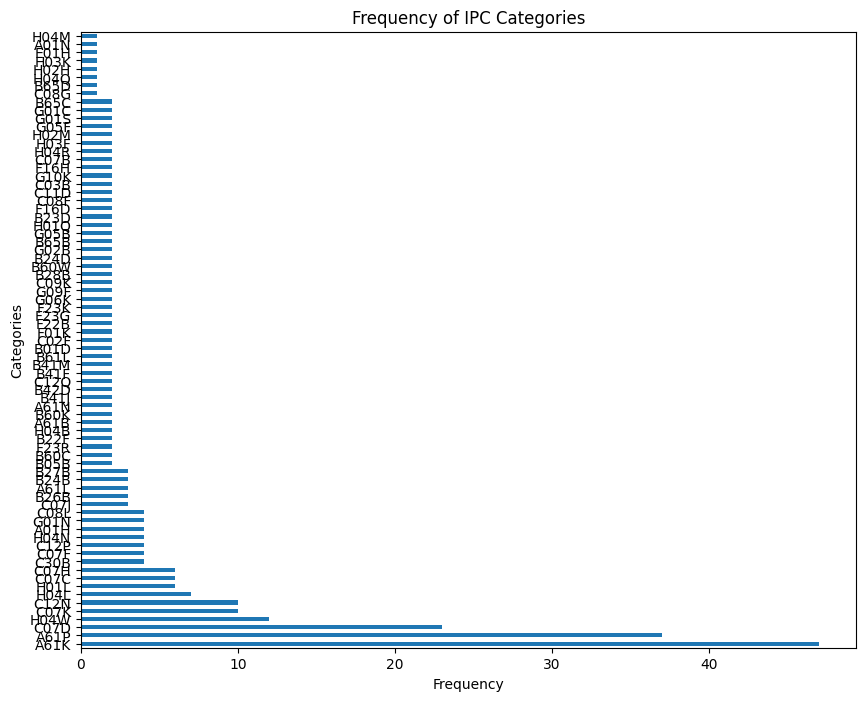

In [28]:
# Contar la frecuencia de cada categoría
category_counts = all_ipc_categories.value_counts()

plt.figure(figsize=(10, 8))
category_counts.plot(kind='barh')  # Cambiado a 'barh' para gráfico horizontal
plt.title('Frequency of IPC Categories')  # Frecuencia de Categorías IPC
plt.xlabel('Frequency')  # Frecuencia en el eje X
plt.ylabel('Categories')  # Categorías en el eje Y
plt.xticks(rotation=0)
plt.show()


In [29]:
category_counts.head(15)

,count
IPC_clean,
A61K,47
A61P,37
C07D,23
H04W,12
C07K,10
C12N,10
H04L,7
H01L,6
C07C,6


## CPC

In [30]:
# categorizar cpc

# Función para extraer y limpiar las categorías CPC en el formato deseado
def clean_cpc_to_sections(cpc_list):
    # Extraer las secciones principales (primeras cuatro letras)
    sections = re.findall(r'([A-Z]\d{2}[A-Z])', cpc_list)
    # Unir las secciones únicas separadas por comas
    cleaned_sections = ', '.join(sorted(set(sections)))
    return cleaned_sections

# Aplicar la función a la columna 'CPC'
df['CPC_clean'] = df['CPC'].apply(clean_cpc_to_sections)


In [31]:
def extract_individual_categories(ipc_list):
    # Eliminar etiquetas HTML y corchetes, y quitar espacios adicionales
    cleaned_list = re.sub(r'<.*?>', '', ipc_list).strip('[" "]')
    # Dividir la cadena en categorías individuales
    categories = [cat.strip()[:4] for cat in cleaned_list.split(',') if len(cat.strip()) >= 4 and not cat.strip().startswith('//')]
    return categories

# Aplicar la función para obtener todas las categorías individuales
all_cpc_categories = df['CPC_clean'].apply(extract_individual_categories).explode()

# Eliminar duplicados
unique_cpc_categories = sorted(all_cpc_categories.dropna().unique())

print(unique_cpc_categories)
print("Numero de categorías CPC:", len(unique_cpc_categories))

['A01G', 'A01H', 'A01N', 'A61B', 'A61K', 'A61L', 'A61N', 'A61P', 'B01D', 'B05B', 'B22F', 'B23D', 'B24B', 'B24D', 'B26B', 'B27B', 'B28B', 'B29C', 'B29D', 'B41F', 'B41J', 'B41M', 'B42D', 'B60C', 'B60K', 'B60W', 'B61L', 'B65B', 'B65C', 'B65H', 'C02F', 'C03B', 'C04B', 'C07B', 'C07C', 'C07D', 'C07F', 'C07H', 'C07J', 'C07K', 'C08F', 'C08G', 'C08J', 'C08L', 'C09K', 'C11D', 'C12N', 'C12P', 'C12Q', 'C12Y', 'C30B', 'D01D', 'D01F', 'E01H', 'F01K', 'F16D', 'F16H', 'F22B', 'F23G', 'F23K', 'F23R', 'G01C', 'G01N', 'G01S', 'G02B', 'G05B', 'G05F', 'G06K', 'G07C', 'G09B', 'G09F', 'G10K', 'H01L', 'H01Q', 'H02H', 'H02M', 'H03F', 'H03K', 'H04B', 'H04L', 'H04M', 'H04N', 'H04W', 'H05B', 'H10K']
Numero de categorías CPC: 85


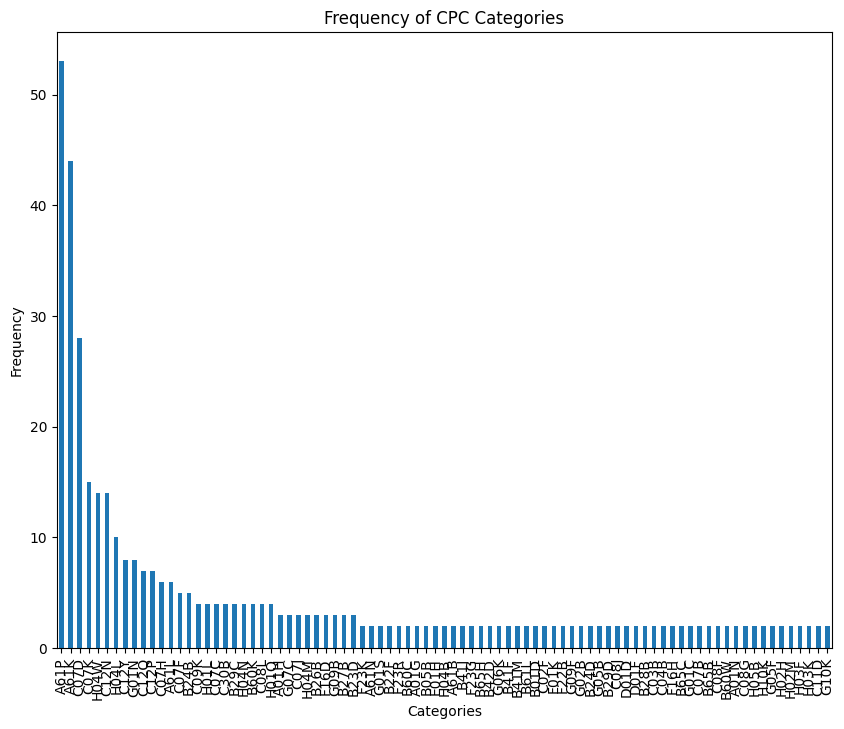

In [32]:
# Contar la frecuencia de cada categoría
category_counts = all_cpc_categories.value_counts()

# Crear el histograma
plt.figure(figsize=(10, 8))
category_counts.plot(kind='bar')
plt.title('Frequency of CPC Categories') # Frecuencia de Categorías CPC
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [33]:
category_counts.head(15)

,count
CPC_clean,
A61P,53
A61K,44
C07D,28
C07K,15
H04W,14
C12N,14
H04L,10
C12Y,8
G01N,8


# Divisional Families

In [34]:
# separar claves y valores de parent applications en dos columnas:
# parent_application_number
# parent_publication_number

# Función para extraer claves y valores
def extract_keys_values(entry):
    if isinstance(entry, str):
        # Convertir la cadena en una lista de diccionarios
        entry = ast.literal_eval(entry)
    keys = []
    values = []
    for dic in entry:
        for k, v in dic.items():
            keys.append(k)
            values.append(v)
    return pd.Series([keys, values])

# Aplicar la función a la columna y crear dos columnas nuevas
df[['parent_application_number', 'parent_publication_number']] = df['Parent_applications'].apply(extract_keys_values)

# Si quieres que las listas resultantes sean cadenas de texto (opcional)
df['parent_application_number'] = df['parent_application_number'].apply(lambda x: ', '.join(x))
df['parent_publication_number'] = df['parent_publication_number'].apply(lambda x: ', '.join(x))

In [35]:
df = df.drop(columns=['Divisional_applications', 'Parent_applications'])

In [36]:
df[['Patent','parent_publication_number']]

,Patent,parent_publication_number
0,EP0721594,
1,EP0737549,
2,EP0788617,
3,EP0885233,
4,EP1105513,
...,...,...
143,EP3937083,EP3238139
144,EP3992203,"EP2596012, EP3121193"
145,EP4036079,EP3394030
146,EP4215191,"EP3220907, EP3804711"


In [37]:
def find_descendants(df, patent, family_id):
    stack = [patent]
    while stack:
        current_patent = stack.pop()
        if pd.isna(df.loc[df['Patent'] == current_patent, 'family_id'].iloc[0]):
            df.loc[df['Patent'] == current_patent, 'family_id'] = family_id

            divisionals = df.loc[
                (df['parent_publication_number'].notna()) &
                (df['parent_publication_number'] != '') &
                (df['parent_publication_number'].str.contains(current_patent, na=False, regex=False)),
                'Patent'
            ]
            stack.extend(divisionals.tolist())

df['family_id'] = np.nan

patriarchs = df[df['parent_publication_number'].isna() | (df['parent_publication_number'] == '')]['Patent']

In [38]:
patriarchs

,Patent
0,EP0721594
1,EP0737549
2,EP0788617
3,EP0885233
4,EP1105513
...,...
113,EP3220907
116,EP3238139
117,EP3238209
118,EP3238235


In [39]:
family_counter = 1

for patriarch in patriarchs:
    if pd.isna(df.loc[df['Patent'] == patriarch, 'family_id'].iloc[0]):
        family_id = family_counter
        find_descendants(df, patriarch, family_id)
        family_counter += 1

num_families = df['family_id'].nunique()
print(f"Número total de familias identificadas: {num_families}")

Número total de familias identificadas: 65


In [40]:
import pandas as pd

# Función para manejar diferentes tipos de datos
def agregar_y_limpiar(x):
    if isinstance(x.iloc[0], (int, float)):
        return list(set(x))
    elif isinstance(x.iloc[0], dict):
        return [dict(t) for t in {tuple(d.items()) for d in x}]
    else:
        return list(set(x))

# Agrupar el DataFrame
df_agrupado = df.groupby('family_id').agg(agregar_y_limpiar).reset_index()

# Función para simplificar las listas de un solo elemento
def simplificar(x):
    if isinstance(x, list) and len(x) == 1:
        return x[0]
    return x

# Aplicar la simplificación a todas las columnas excepto 'family_id'
for col in df_agrupado.columns:
    if col != 'family_id':
        df_agrupado[col] = df_agrupado[col].apply(simplificar)

In [41]:
df_agrupado

,family_id,Patent,Patent_Name,Status,Most_Recent_Event_Date,Most_Recent_Event,Inventors,Priority_numbers,Applicants,Representatives,...,Opponent,Publications,patent_family,counterType_patent_family,firstDate_patent_family,lastDate_patent_family,IPC_clean,CPC_clean,parent_application_number,parent_publication_number
0,1.0,"[EP1167108, EP0721594]","[AUTONOMOUS CRUISE CONTROL, Autonomous cruise ...","[The application is deemed to be withdrawn, No...","[22.08.2003, 28.12.2007]","[Application deemed to be withdrawn, Lapse of ...","[[{""number"": ""01"", ""name"": ""Woll, Jerry"", ""add...",[{'US19930130585': '01.10.1993'}],"[{""type"": ""current"", ""for"": ""For all designate...","[[{""name"": ""R\u00fcger Abel Patentanw\u00e4lte...",...,[],"[[{""Type"": ""A1\u00a0Application with search re...","[[{'Publication No.': 'JP3104998B', 'Date': '3...","[{'B2': 1, 'A': 4, 'B1': 1, 'A4': 1, 'A1': 4, ...",1995-04-13,2003-05-08,"B60K, G01S","B60K, B60W, G01S","[, EP94928670.2]","[, EP0721594]"
1,2.0,"[EP1250983, EP0737549]","[Abrasive tape, Abrasive tape and process for ...","[The application is deemed to be withdrawn, No...","[22.01.2010, 24.10.2003]","[Application deemed to be withdrawn, No opposi...","[[{""number"": ""01"", ""name"": ""Fujii, Kazuhito, D...","[{'JP19950109088': '10.04.1995'}, {'JP19960005...","[[{""type"": ""current"", ""for"": ""For all designat...","[{""name"": ""M\u00fcller-Bor\u00e9 &amp; Partner...",...,[],"[[{""Type"": ""A1\u00a0Application with search re...","[nan, [{'Publication No.': 'JP2002254326', 'Da...","[nan, {'A': 6, 'B2': 2, 'A1': 3, 'B1': 3, 'A3'...","[1996-10-16, nan]","[2005-07-27, nan]",B24D,"B24B, B24D","[, EP96105584.5]","[, EP0737549]"
2,3.0,"[EP0788617, EP1168032]",[MINIATURE OPTICAL SCANNER FOR A TWO AXIS SCAN...,"[The application is deemed to be withdrawn, No...","[04.01.2008, 05.11.2004]","[Application deemed to be withdrawn, Lapse of ...","[[{""number"": ""01"", ""name"": ""MELVILLE, Charles,...",[{'US19940329508': '26.10.1994'}],"[{""type"": ""current"", ""for"": ""For all designate...","[{""name"": ""Hitchcock, Esmond Antony"", ""address...",...,[],"[[{""Type"": ""A1\u00a0Application with search re...","[[{'Publication No.': 'JP2001523350', 'Date': ...","[{'A': 4, 'B1': 2, 'A4': 1, 'A1': 4, 'A3': 1, ...",1996-05-09,2006-08-22,G02B,G02B,"[, EP95936227.8]","[, EP0788617]"
3,4.0,"[EP1164138, EP0885233]","[TERPYRIDINE-PLATINUM(II) COMPLEXES, Terpyridi...","[The application is deemed to be withdrawn, No...","[23.04.2004, 25.04.2003]","[Application deemed to be withdrawn, No opposi...","[[{""number"": ""01"", ""name"": ""Lowe, Gordon"", ""ad...",[{'GB19960001603': '26.01.1996'}],"[{""type"": ""current"", ""for"": ""For all designate...","[[{""name"": ""Ellis-Jones, Patrick George Armine...",...,[],"[[{""Type"": ""A1\u00a0Application with search re...","[nan, [{'Publication No.': 'JP2000503982', 'Da...","[nan, {'A': 1, 'B1': 1, 'A1': 5, 'T1': 1, 'T2'...","[1996-03-27, nan]","[nan, 2002-11-16]","[C07D, C07F, C07H, A61K, C07D, C07F, C07H]","A61P, C07D, C07F, C07H","[, EP97901187.1]","[, EP0885233]"
4,5.0,"[EP1489185, EP1105513]",[METHODS AND COMPOSITIONS FOR USE IN SPLICEOSO...,The application is deemed to be withdrawn,"[14.01.2005, 29.12.2006]",Application deemed to be withdrawn,"[[{""number"": ""01"", ""name"": ""Mitchell, Lloyd G....","[{'US19980133717': '13.08.1998'}, {'US19980158...","[{""type"": ""current"", ""for"": ""For all designate...","[[{""name"": ""Lucas, Brian Ronald"", ""address_lin...",...,[],"[[{""Type"": ""A1\u00a0Application with search re...","[[{'Publication No.': 'WO9722250', 'Date': '26...","{'A1': 21, 'A3': 3, 'A2': 6, 'A': 13, 'B2': 8,...",1997-06-26,2015-11-24,"A61K, C12N","A61K, A61P, C07K, C12N","[, EP99943690.0]","[, EP1105513]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61.0,"[EP4215191, EP3220907, EP3804711]","[METHODS OF TREATING MULTIPLE SCLEROSIS, COMPO...","[The application is deemed to be withdrawn, Th...","[26.01.20

## IPC agrupado

In [42]:
df['IPC_clean']

,IPC_clean
0,"B60K, G01S"
1,B24D
2,G02B
3,"C07D, C07F, C07H"
4,"A61K, C12N"
...,...
143,G06K
144,"C07K, C12N"
145,"A61K, A61P, C07D"
146,"A61K, A61P"


In [43]:
df_agrupado['IPC_clean']

,IPC_clean
0,"B60K, G01S"
1,B24D
2,G02B
3,"[C07D, C07F, C07H, A61K, C07D, C07F, C07H]"
4,"A61K, C12N"
...,...
60,"A61K, A61P"
61,G06K
62,G10K
63,H01L


In [44]:
# Función para convertir listas a cadenas
def convert_to_string(value):
    if isinstance(value, list):  # Si es una lista
        return ', '.join(value)  # Une los elementos de la lista en una cadena separada por comas
    elif isinstance(value, str):  # Si ya es una cadena
        return value  # Dejarla como está
    else:
        return str(value)  # Para otros casos, convertirlo a cadena

# Aplicar la función a la columna 'IPC_clean'
df_agrupado['IPC_clean'] = df_agrupado['IPC_clean'].apply(convert_to_string)

# Mostrar el DataFrame actualizado
df_agrupado['IPC_clean']


,IPC_clean
0,"B60K, G01S"
1,B24D
2,G02B
3,"C07D, C07F, C07H, A61K, C07D, C07F, C07H"
4,"A61K, C12N"
...,...
60,"A61K, A61P"
61,G06K
62,G10K
63,H01L


In [45]:
all_ipc_categories = df_agrupado['IPC_clean'].str.split(', ').explode()

# Eliminar duplicados
unique_ipc_categories = sorted(all_ipc_categories.dropna().unique())

print(unique_ipc_categories)
print("Numero de categorías IPC:", len(unique_ipc_categories))

['', 'A01H', 'A01N', 'A61B', 'A61K', 'A61L', 'A61N', 'A61P', 'B01D', 'B05B', 'B22F', 'B23D', 'B24B', 'B24D', 'B26B', 'B27B', 'B28B', 'B41F', 'B41J', 'B41M', 'B42D', 'B60C', 'B60K', 'B60W', 'B61L', 'B65B', 'B65C', 'B65D', 'C02F', 'C03B', 'C07B', 'C07C', 'C07D', 'C07F', 'C07H', 'C07J', 'C07K', 'C08F', 'C08G', 'C08L', 'C09K', 'C11D', 'C12N', 'C12P', 'C12Q', 'C30B', 'E01H', 'F01K', 'F16D', 'F16H', 'F22B', 'F23G', 'F23K', 'F23R', 'G01C', 'G01N', 'G01S', 'G02B', 'G05B', 'G05F', 'G06K', 'G09F', 'G10K', 'H01L', 'H01Q', 'H02H', 'H02M', 'H03F', 'H03K', 'H04B', 'H04L', 'H04M', 'H04N', 'H04Q', 'H04R', 'H04W']
Numero de categorías IPC: 76


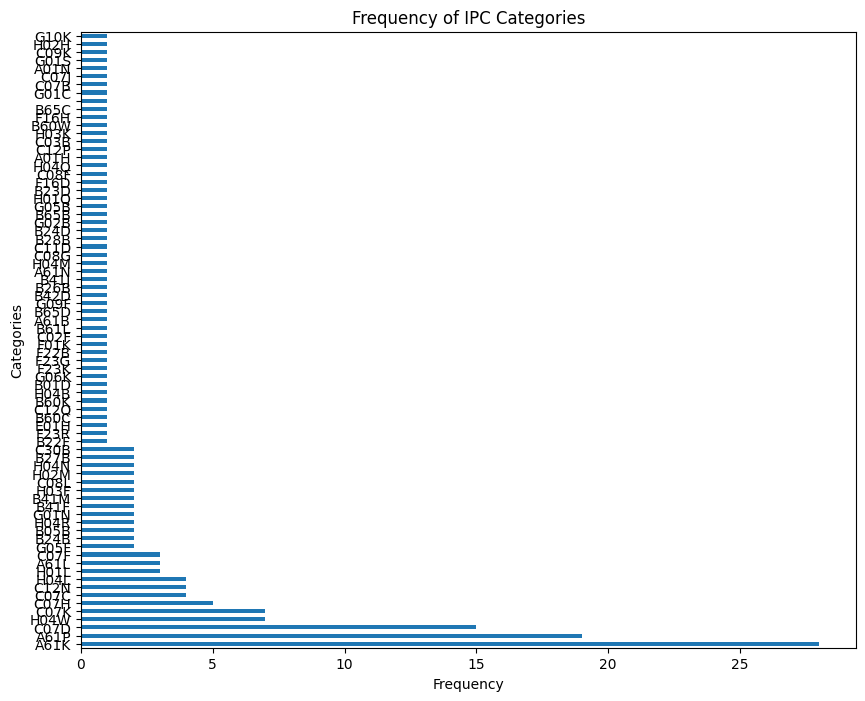

In [46]:
# Contar la frecuencia de cada categoría
category_counts = all_ipc_categories.value_counts()

plt.figure(figsize=(10, 8))
category_counts.plot(kind='barh')
plt.title('Frequency of IPC Categories')  # Frecuencia de Categorías IPC
plt.xlabel('Frequency')  # Frecuencia en el eje X
plt.ylabel('Categories')  # Categorías en el eje Y
plt.xticks(rotation=0)
plt.show()


In [47]:
category_counts.head(15)

,count
IPC_clean,
A61K,28
A61P,19
C07D,15
H04W,7
C07K,7
C07H,5
C07C,4
C12N,4
H04L,4


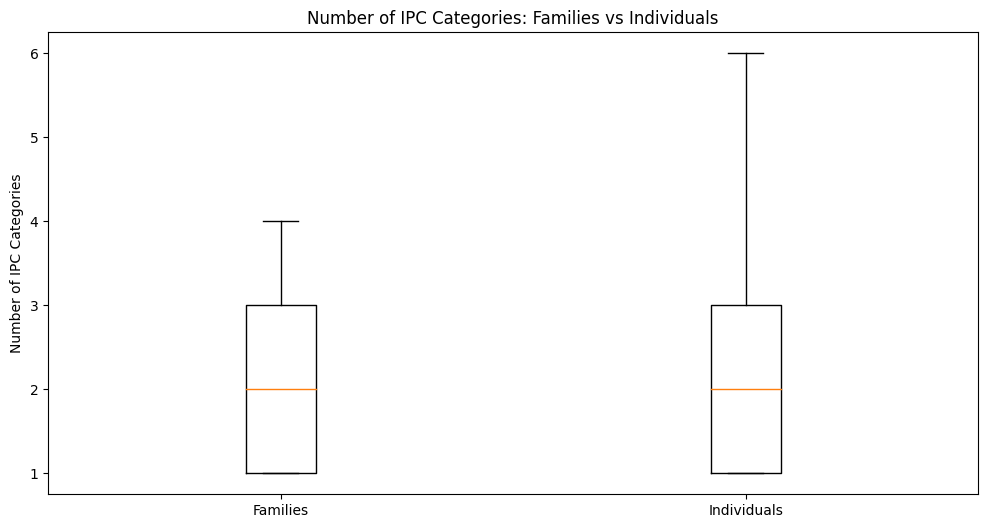

In [48]:
# Contar el número de categorías por fila (familias)
df_agrupado['num_categories_families'] = df['IPC_clean'].str.split(', ').apply(len)

# Para los divisionales individuales
df['num_categories_individuals'] = df['IPC_clean'].str.split(', ').apply(len)

# Visualización comparativa
plt.figure(figsize=(12, 6))
plt.boxplot([df_agrupado['num_categories_families'], df['num_categories_individuals']], labels=['Families', 'Individuals'])
plt.title('Number of IPC Categories: Families vs Individuals')
plt.ylabel('Number of IPC Categories')
plt.show()


In [49]:
list(df.columns)

['Patent',
 'Patent_Name',
 'Status',
 'Most_Recent_Event_Date',
 'Most_Recent_Event',
 'Inventors',
 'Priority_numbers',
 'Applicants',
 'Representatives',
 'IPC',
 'CPC',
 'Opponent',
 'Publications',
 'patent_family',
 'counterType_patent_family',
 'firstDate_patent_family',
 'lastDate_patent_family',
 'IPC_clean',
 'CPC_clean',
 'parent_application_number',
 'parent_publication_number',
 'family_id',
 'num_categories_individuals']

In [50]:
df_model = pd.read_csv('/content/drive/My Drive/TFMSandoz/Entrega/DatosFinales/df_Ready_For_Model.csv')
df_model

,family_id,Status_nan,Status_The application has been withdrawn,Status_Patent revoked,Status_Examination is in progress,Status_The application has been published,Status_No opposition filed within time limit,Status_Request for examination was made,Status_The application is deemed to be withdrawn,Status_The application has been refused,...,PatentFamily_Type_D1,PatentFamily_Type_B6,PatentFamily_Type_T2,PatentFamily_Type_I2,PatentFamily_Type_D0,PatentFamily_Type_E,PatentFamily_Type_L,PatentFamily_Type_C,PatentFamily_Type_A3,PatentFamily_Type_total
0,1.0,0,0,0,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,13
1,2.0,0,0,0,0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,16
2,3.0,0,0,0,0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,13
3,4.0,0,0,0,0,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,12
4,5.0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61.0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,48
61,62.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,10
62,63.0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,18
63,64.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,19


In [51]:
# 1. Identificar las columnas binarias y no numéricas
binary_columns = [col for col in df_model.columns if df_model[col].nunique() == 2]

# 2. Extraer la parte del nombre de las columnas antes del último '_' manteniendo el orden
binary_columns_cleaned = []
seen = set()  # Para evitar duplicados

for col in binary_columns:
    cleaned_col = col.rsplit('_', 1)[0]
    if cleaned_col not in seen:
        binary_columns_cleaned.append(cleaned_col)
        seen.add(cleaned_col)

# Mostrar la lista resultante en orden
binary_columns_cleaned


['Status',
 'totally',
 'Most_Recent_Event_Date',
 'firstDate_patent_family',
 'lastDate_patent_family',
 'Most_Recent_Event',
 'Inventor',
 'Inventor_Countries',
 'Representative',
 'Representative_Countries',
 'Applicant',
 'Applicant_Countries',
 'Applicants_Countries_num',
 'PriorityNumber_Countries',
 'PriorityNumber_Min_Date',
 'PriorityNumber_Max_Date',
 'CPC',
 'CPC_Country',
 'IPC',
 'Publication_Type',
 'Publication_Date_Min',
 'Publication_Date_Max',
 'PatentFamily_Publication_No_Countries',
 'PatentFamily_Date_Min',
 'PatentFamily_Date_Max',
 'PatentFamily_Type']

In [52]:
# 1. Seleccionar todas las columnas numéricas
numeric_columns = df_model.select_dtypes(include=['number']).columns

# 2. Filtrar las columnas que no son binarias (más de dos valores únicos)
numeric_non_binary_columns = [col for col in numeric_columns if df_model[col].nunique() > 2]

# Mostrar la lista de columnas numéricas no binarias
numeric_non_binary_columns


['family_id',
 'percentage_revoked',
 'Most_Recent_Event_Date_year',
 'Most_Recent_Event_Date_month',
 'Most_Recent_Event_Date_quarter',
 'firstDate_patent_family_year',
 'firstDate_patent_family_month',
 'firstDate_patent_family_quarter',
 'lastDate_patent_family_year',
 'lastDate_patent_family_month',
 'lastDate_patent_family_quarter',
 'Most_Recent_Event_Patent Lapse',
 'Most_Recent_Event_Application Withdrawn',
 'Inventors_num_total',
 'Inventors_Countries_num_total',
 'Representatives_num_total',
 'Representatives_Countries_num_total',
 'Applicants_num_total',
 'PriorityNumber_total',
 'PriorityNumbers_Countries_num_total',
 'PriorityNumber_Min_Date_year',
 'PriorityNumber_Min_Date_month',
 'PriorityNumber_Min_Date_quarter',
 'PriorityNumber_Max_Date_year',
 'PriorityNumber_Max_Date_month',
 'PriorityNumber_Max_Date_quarter',
 'CPC_total',
 'CPC_Countries_total',
 'IPC_total',
 'Publication_Type_total',
 'Publication_No_total',
 'Publication_Date_Min_year',
 'Publication_Date_Min_